# Generators & Comprehension Expressions
<div class="alert alert-warning">

**Note**:

There are reading-comprehension exercises included throughout the text. These are meant to help you put your reading to practice. Solutions for the exercises are included at the bottom of this page.
</div>


## Introducing Generators
Now we introduce an important type of object called a **generator**, which allows us to generate arbitrarily-many items in a series, without having to store them all in memory at once.  

<div class="alert alert-info">

**Definition**:

A **generator** is a special kind of iterator, which stores the instructions for how to *generate* each of its members, in order, along with its current state of iterations. It generates each member, one at a time, only as it is requested via iteration.
</div>

Recall that that a list readily stores all of its members; you can access any of its contents via indexing. A generator, on the other hand, *does not store any items*. Instead, it stores the instructions for generating each of its members, and stores its iteration state; this means that the generator will know if it has generated its second member, and will thus generate its third member the next time it is iterated on. 

The whole point of this is that you can use a generator to produce a long sequence of items, without having to store them all in memory.

### The `range` generator
An extremely popular built-in generator is `range`, which, given the values: 

- 'start' (inclusive, default=0)
- 'stop' (exclusive)
- 'step' (default=1) 

will generate the corresponding sequence of integers (from start to stop, using the step size) upon iteration. Consider the following example usages of `range`:
```python
# start: 2  (included)
#  stop: 7  (excluded)
#  step: 1  (default)
for i in range(2, 7):
    print(i)
# prints: 2.. 3.. 4.. 5.. 6
```
***
```python
# start:  1  (included)
#  stop: 10  (excluded)
#  step:  2
for i in range(1, 10, 2):
    print(i)
# prints: 1.. 3.. 5.. 7.. 9
```
***
```python
# A very common use case!
# start:  0  (default, included)
#  stop:  5  (excluded)
#  step:  1  (default)
for i in range(5):
    print(i)
# prints: 0.. 1.. 2.. 3.. 4
```

Because `range` is a generator, the command `range(5)` will simply store the instructions needed to produce the sequence of numbers 0-4, whereas the list `[0, 1, 2, 3, 4]` stores all of these items in memory at once. For short sequences, this seems to be a rather paltry savings; this is not the case for long sequences. The following graph compares the memory consumption used when defining a generator for the sequence of numbers $0-N$ using `range`, compared to storing the sequence in a list:

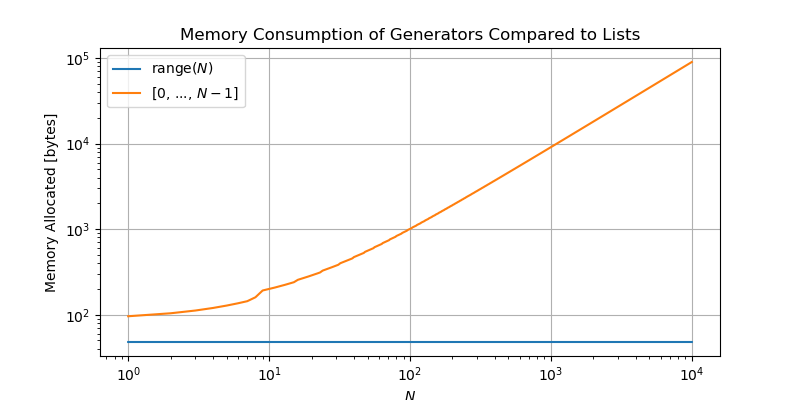

Given our discussion of generators, it should make sense that the memory consumed simply by defining `range(N)` is independent of $N$, whereas the memory consumed by the list grows linearly with $N$ (for large $N$).

<div class="alert alert-info">

**Takeaway**: 

`range` is a built-in generator, which generates sequences of integers.
</div>


***

**Reading Comprehension: Using `range`**:

Using `range` in a for-loop, print the numbers 10-1, in sequence.

***

## Creating your own generator: generator comprehensions
Python provides a sleek syntax for defining a simple generator in a single line of code; this expression is known as a **generator comprehension**. The following syntax is extremely useful and will appear very frequently in Python code:

<div class="alert alert-info">
**Definition**: 

The syntax 
<br>
`(<expression> for <var> in <iterable> [if <condition>])`
<br>
specifies the general form for a **generator comprehension**. This produces a generator, whose instructions for generating its members are provided within the parenthetical statement. 
</div>

Written in a long form, the pseudo-code for 
```
(<expression> for <var> in <iterable> if <condition>)
``` 
is:

```
for <var> in <iterable>:
    if bool(<condition>):
        yield <expression>
```

The following expression defines a generator for all the even numbers in 0-99:
```python
# when iterated over, `even_gen` will generate 0.. 2.. 4.. ... 98
even_gen = (i for i in range(100) if i%2 == 0)
```

The `if <condition>` clause in the generator expression is optional. The generator comprehension 
```
(<expression> for <var> in <iterable>)
``` 
corresponds to:

```
for <var> in <iterable>:
    yield <expression>
```

For example:
```python
# when iterated over, `example_gen` will generate 0/2.. 9/2.. 21/2.. 32/2
example_gen = (i/2 for i in [0, 9, 21, 32])

for item in example_gen:
    print(item)
# prints: 0.5.. 4.5.. 10.5.. 16.0
```

`<expression>` can be any valid single-line of Python code that returns an object:
```python
((i, i**2, i**3) for i in range(10))
# will generate:
# (0, 0, 0)
# (1, 1, 1)
# (2, 4, 8)
# (3, 9, 27)
# (4, 16, 64)
# (5, 25, 125)
# (6, 36, 216)
# (7, 49, 343)
# (8, 64, 512)
# (9, 81, 729)
```

This means that `<expression>` can even involve inline if-else statements!
```python
(("apple" if i < 3 else "pie") for i in range(6))
# will generate:
# 'apple'..
# 'apple'..
# 'apple'..
# 'pie'..
# 'pie'..
# 'pie'
```

<div class="alert alert-info">

**Takeaway**:  

A generator comprehension is a single-line specification for defining a generator in Python. It is absolutely essential to learn this syntax in order to write simple and readable code.
</div>

<div class="alert alert-warning">

**Note**:  

Generator comprehensions are **not** the only method for defining generators in Python. We will briefly introduced a more fully-fledged syntax for defining generators. One can define a generator similar to the way one can define a function (which we will encounter soon). [See this section of the official Python tutorial](https://docs.python.org/3/tutorial/classes.html#generators) if you are interested in diving deeper into generators.
</div>

***

**Reading Comprehension: Writing a Generator Comprehension**:

Using a generator comprehension, define a generator for the series:
```
(0, 2).. (1, 3).. (2, 4).. (4, 6).. (5, 7)
```

Note that (3, 5) is *not* in the series.

Iterate over the generator and print its contents to verify your solution.

***

### Storing generators
Just like we saw with the `range` generator, defining a generator using a comprehension does *not* perform any computations or consume any memory beyond defining the rules for producing the sequence of data. See what happens when we try to print this generator:
```python
# will generate 0, 1, 4, 9, 25, ..., 9801
>>> gen = (i**2 for i in range(100))
>>> print(gen)
<generator object <genexpr> at 0x000001E768FE8A40>
```
This output simply indicates that `gen` stores a generator-expression at the memory address `0x000001E768FE8A40`; this is simply where the instructions for generating our sequence of squared numbers is stored. `gen` will not produce any results until we iterate over it. For this reason, generators cannot be inspected in the same way that lists and other sequences can be. You **cannot** do the following:
```python
# you **cannot** do the following...
>>> gen = (i**2 for i in range(100))

# query the length of a generator
>>> len(gen)
TypeError: object of type 'generator' has no len()
    
# index into a generator
>>> gen[2]
TypeError: 'generator' object is not subscriptable
```

The sole exception to this is the `range` generator, for which all of these inspections are valid.

### Consuming generators
We can feed this to any function that accepts iterables. For instance, we can feed `gen` to the built-in `sum` function, which sums the contents of an iterable:
```python
>>> gen = (i**2 for i in range(100))
>>> sum(gen)  # computes the sum 0 + 1 + 4 + 9 + 25 + ... + 9801
328350
```
This computes the sum of the sequence of numbers *without ever storing the full sequence of numbers in memory*. In fact, only two numbers need be stored during any given iteration of the sum: the current value of the sum, and the number being added to it.

What happens if we run this command a second time:
```python
# computes the sum of ... nothing!
# `gen` has already been consumed!
>>> sum(gen)
0
```
It may be surprising to see that the sum now returns 0. This is because **a generator is exhausted after it is iterated over in full**. You must redefine the generator if you want to iterate over it again; fortunately, defining a generator requires very few resources, so this is not a point of concern.

You can also check for membership in a generator, but this also consumes the generator:

```python
# checking for membership consumes a generator until
# it finds that item (consuming the entire generator
# if the item is not contained within it)
>>> gen = (i for i in range(1, 11))
>>> 5 in gen  # first 5 elements are consumed 
True

# 1-5 are no longer contained in gen
# this check consumes the entire generator!
>>> 5 in gen  
False

>>> sum(gen)
0
```

<div class="alert alert-info">

**Takeaway**:

A generator can only be iterated over once, after which it is exhausted and must be re-defined in order to be iterated over again.
</div>


### Chaining comprehensions
Because generators are iterables, they can be fed into subsequent generator comprehensions
```python
# generates 400.. 100.. 0.. 100.. 400 
>>> gen_1 = (i**2 for i in [-20, -10, 0, 10, 20])

# sums the generated numbers, excluding any numbers whose absolute value is greater than 150
>>> sum(i for i in gen_1 if abs(i) <= 150)
200
```

### Using generator comprehensions on the fly
A feature of Python, that can make your code supremely readable and intuitive, is that generator comprehensions can be fed *directly* into functions that operate on iterables. That is,

```python
>>> gen = (i**2 for i in range(100))
>>> sum(gen)
328350
```

can be simplified as:

```python
>>> sum(i**2 for i in range(100))
328350
```

If you want your code to compute the finite harmonic series: $\sum_{k=1}^{100} \frac{1}{n} = 1 + \frac{1}{2} + ... + \frac{1}{100}$, you can simply write:
```python
>>> sum(1/n for n in range(1, 101))
5.187377517639621
```

This convenient syntax works for any function that expects an iterable as an argument, such as the `list` function and `all` function:
```python
# providing generator expressions as arguments to functions
# that operate on iterables
>>> list(i**2 for i in range(10))
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

>>> all(i < 10 for i in [1, 3, 5, 7])
True

>>> ", ".join(str(i) for i in [10, 200, 4000, 80000])
'10, 200, 4000, 80000'
```
<div class="alert alert-info">

**Takeaway**:

A generator comprehension can be specified directly as an argument to a function, wherever a single iterable is expected as an input to that function.
</div>

***

**Reading Comprehension: Using Generator Comprehensions on the Fly**:

In a single line, compute the sum of all of the odd-numbers in 0-100.

***

## Iterating over generators using `next`
The built-in function `next` allows you manually "request" the next member of a generator, or more generally, any kind of *iterator*. Calling `next` on an exhausted iterator will raise a `StopIteration` signal.

```python
>>> short_gen = (i/2 for i in [1, 2, 3])

>>> next(short_gen)
0.5

>>> next(short_gen)
1.0

>>> next(short_gen)
1.5

>>> next(short_gen)
StopIteration                             
Traceback (most recent call last)
<ipython-input-5-ed60a54ccf0b> in <module>()
----> 1 next(short_gen)

StopIteration:
```

This is a great tool for retrieving content from a generator, or any iterator, without having to perform a for-loop over it.

### Iterables vs. Iterators
This subsection is *not* essential to your basic understanding of the material. I am including it to prevent this text from being misleading to those who already know quite a bit about Python. **This is a bit advanced, feel free to skip it...**

There is a bit of confusing terminology to be cleared up: an iterable is not the same thing as an iterator.

An *iterator* object stores its current state of iteration and "yields" each of its members in order, on demand via `next`, until it is exhausted. As we've seen, a generator is an example of an iterator. We now must understand that every iterator is an iterable, but not every iterable is an iterator.

An *iterable* is an object that *can* be iterated over but does not necessarily have all the machinery of an iterator. For example, sequences (e.g lists, tuples, and strings) and other containers (e.g. dictionaries and sets) do not keep track of their own state of iteration. Thus you cannot call `next` on one of these outright: 

```python
# a list is an example of an iterable that is *not*
# an iterator - you cannot call `next` on it.
>>> x = [1, 2, 3]
>>> next(x)
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-19-b9d20096048c> in <module>()
----> 1 next([1,2])

TypeError: 'list' object is not an iterator
```
In order to iterate over, say, a list you must first pass it to the built-in `iter` function. This function will return an *iterator* for that list, which stores its state of iteration and the instructions to yield each one of the list's members:
```python
# any iterable can be fed to `iter`
# to produce an iterator for that object
>>> x = [1, 2, 3]
>>> x_it = iter(x)  # `x_it` is an iterator
>>> next(x_it)
1
>>> next(x_it)
2
>>> next(x_it)
3
```
In this way, a list is an *iterable* but not an *iterator*, which is also the case for tuples, strings, sets, and dictionaries.

Python actually creates an iterator "behind the scenes", whenever you perform a for-loop over an iterable like a list. It feeds that iterable to `iter`, and then proceeds to call `next` on the resulting iterator for each of the for-loop's iterations.

## List & Tuple Comprehensions
Using generator comprehensions to initialize lists is so useful that Python actually reserves a specialized syntax for it, known as the list comprehension. A **list comprehension** is a syntax for constructing a list, which exactly mirrors the generator comprehension syntax:

```
[<expression> for <var> in <iterable> {if <condition}]
```

For example, if we want to create a list of square-numbers, we can simply write:
```python
>>> [i**2 for i in range(10)]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
```

This produces the exact same result as feeding the `list` function a generator comprehension. However, using a list comprehension is slightly more efficient than is feeding the `list` function a generator comprehension.

Let's appreciate how economical list comprehensions are. The following code stores words that contain the letter "o", in a list:
```python
words_with_o = []

for word in ['Python', 'Like', 'You', 'Mean', 'It']:
    if "o" in word.lower():
        words_with_o.append(word)
```

This can be written in a single line, using a list comprehension:
```python
>>> words_with_o = [word for word in ['Python', 'Like', 'You', 'Mean', 'It'] if "o" in word.lower()]
>>> words_with_o
['Python', 'You']
```

Tuples can be created using comprehension expressions too, but we must explicitly invoke the `tuple` constructor since parentheses are already reserved for defining a generator-comprehension.
```python
# creating a tuple using a comprehension expression
>>> tuple(i**2 for i in range(5))
(0, 1, 4, 9, 16)
```

<div class="alert alert-info">

**Takeaway**:

 The comprehensions-statement is an extremely useful syntax for creating simple and complicated lists and tuples alike.
</div>

### Nesting comprehensions
It can be useful to nest comprehension expressions within one another, although this should be used sparingly.
```python
# Nested list comprehensions.
# This creates a 3x4 "matrix" (list of lists) of zeros.
>>> [[0 for col in range(4)] for row in range(3)]
[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
```

***

**Reading Comprehension: List Comprehensions**:

Use a list comprehension to create a list that contains the string "hello" 100 times.

***

***

**Reading Comprehension: Fancier List Comprehensions**:

Use the inline `if-else` statement (discussed earlier in this module), along with a list comprehension, to create the list:

```python
['hello',
 'goodbye',
 'hello',
 'goodbye',
 'hello',
 'goodbye',
 'hello',
 'goodbye',
 'hello',
 'goodbye']
```

***

***

**Reading Comprehension: Translating a For-Loop**:

Replicate the functionality of the the following code by writing a list comprehension.
```python
# skip all non-lowercased letters (including punctuation)
# append 1 if lowercase letter is "o"
# append 0 if lowercase letter is not "o"
out = []
for i in "Hello. How Are You?":
    if i.islower():
        out.append(1 if i is "o" else 0)
```

***

***

**Reading Comprehension: Memory Efficiency**:

Is there any difference in performance between the following expressions?

```python
# feeding `sum` a generator comprehension
sum(1/n for n in range(1, 101))
```

```python
# feeding `sum` a list comprehension
sum([1/n for n in range(1, 101)])
```

Is one expression preferable over the other? Why?

***

## Reading Comprehension Exercise Solutions:

**Using range: Solution**
```python
# start=10, stop=0 (excluded), step-size=-1
for i in range(10, 0, -1):
    print(i)
```

**Writing a Generator Comprehension: Solution**
```python
((n, n+2) for n in range(6) if n != 3)
```

**Using Generator Comprehensions on the Fly: Solution**
```python
sum(range(1, 101, 2))
```

or

```python
sum(i for i in range(101) if i%2 != 0)
```

**List Comprehensions: Solution**
```python
["hello" for i in range(100)]
```

**Fancier List Comprehensions: Solution**
```python
[("hello" if i%2 == 0 else "goodbye") for i in range(10)]
```

**Translating a For-Loop: Solution**
```python
out = [(1 if i is "o" else 0) for i in "Hello. How Are You?" if i.islower()]
```

**Memory Efficiency: Solution**

It is preferable to use the generator expression `sum(1/n for n in range(1, 101))`, rather than the list comprehension `sum([1/n for n in range(1, 101)])`. Using a list comprehension unnecessarily creates a list of the one hundred numbers, in memory, before feeding the list to `sum`. The generator expression need only produce a single value at a time, as `sum` iterates over it.